In [1]:
#Pandas will be the backbone of our data manipulation.
import pandas as pd
from pandas.io.json import json_normalize
#Seaborn is a data visualization library.
import seaborn as sns
#Matplotlib is a data visualization library. 
#Seaborn is actually built on top of Matplotlib. 
import matplotlib.pyplot as plt
#Numpy will help us handle some work with arrays.
import numpy as np
#Datetime will allow Python to recognize dates as dates, not strings.
from datetime import datetime
#sklearn normalizer
from sklearn import preprocessing

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv('clean_values.csv', index_col=None)

In [4]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

#df = df.dropna(subset=['Wind Speed'])

This is a Density Plot contaning the count of average speed per activities. 

You can clearly see that there's a huge drop between 29 and 30 kph

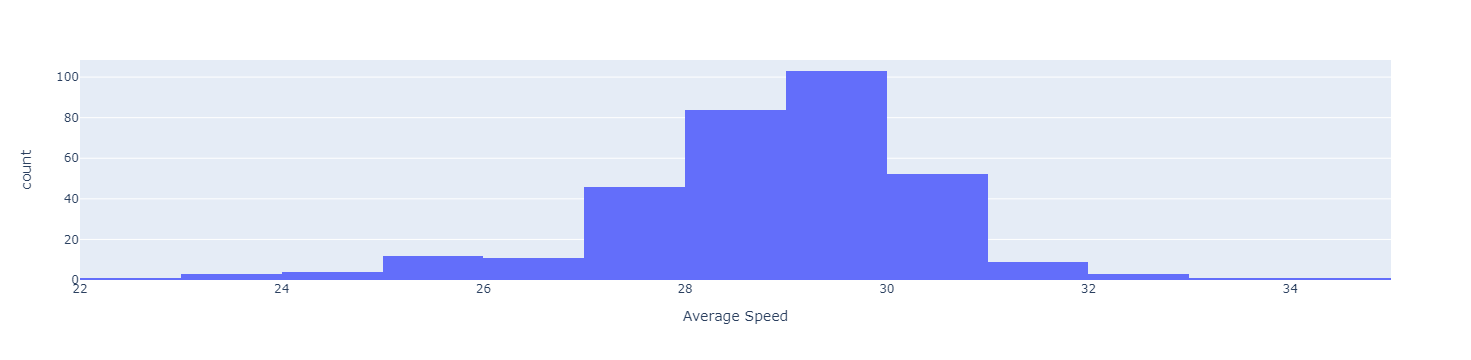

In [5]:
hist = px.histogram(df, x="Average Speed", nbins=20)
hist.show()

The next two scatter plots show how the average speed changed as the time passed.

The first is a Connected Scatter plot.

The second is a traditional scatter plot with a trendline

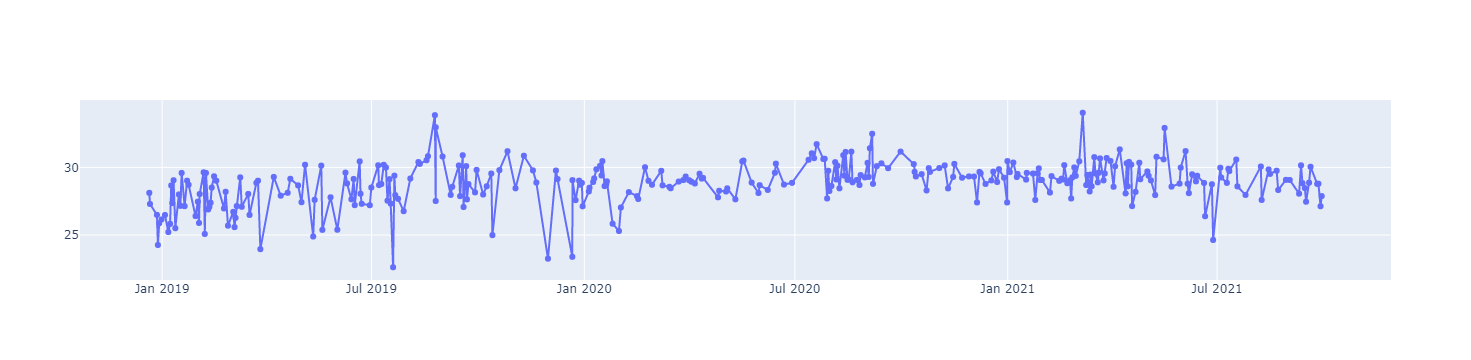

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Activity Date'], y=df['Average Speed'],
                    mode='lines+markers'))
fig.show()

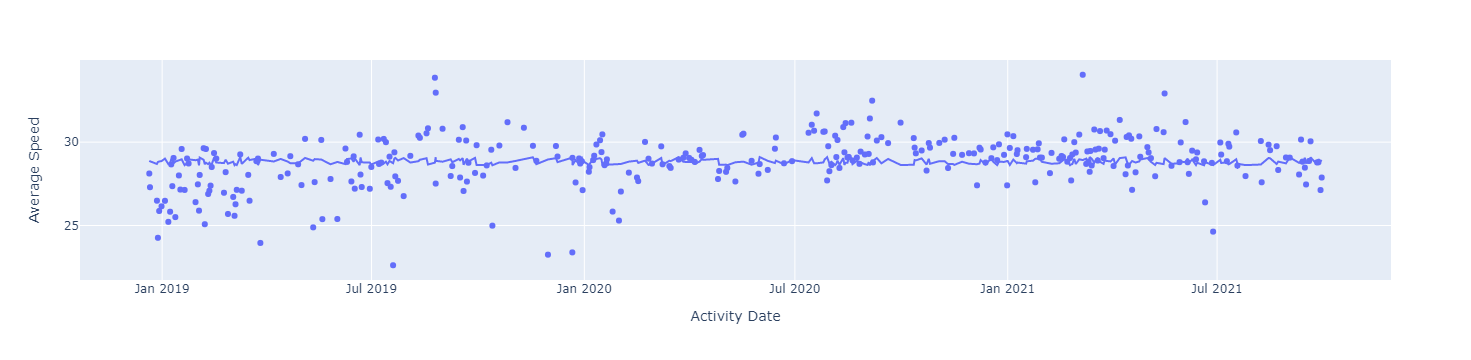

In [7]:
fig = px.scatter(df, x="Activity Date", y="Average Speed", trendline="ols")
fig.show()

This scatter plot shows the relationship between the average watts and the average cadence of the activities. 

There's also a Violin Plot to Average Cadence and a Box Plot to Average Watts

We can notice that there's a linear relationship between them.

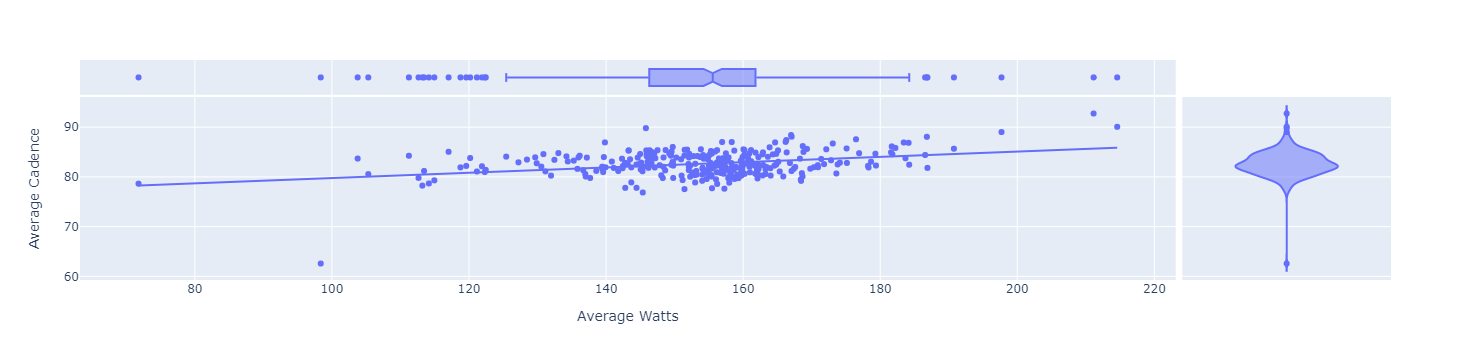

In [8]:
fig = px.scatter(df, x="Average Watts", y="Average Cadence", trendline="ols",  marginal_y='violin', marginal_x='box')
fig.show()

The speed and the cadence also have a positive correlation (usually higher cadence means higher average speed).

It also have a Violin Plot for cadence and a Box Plot for speed

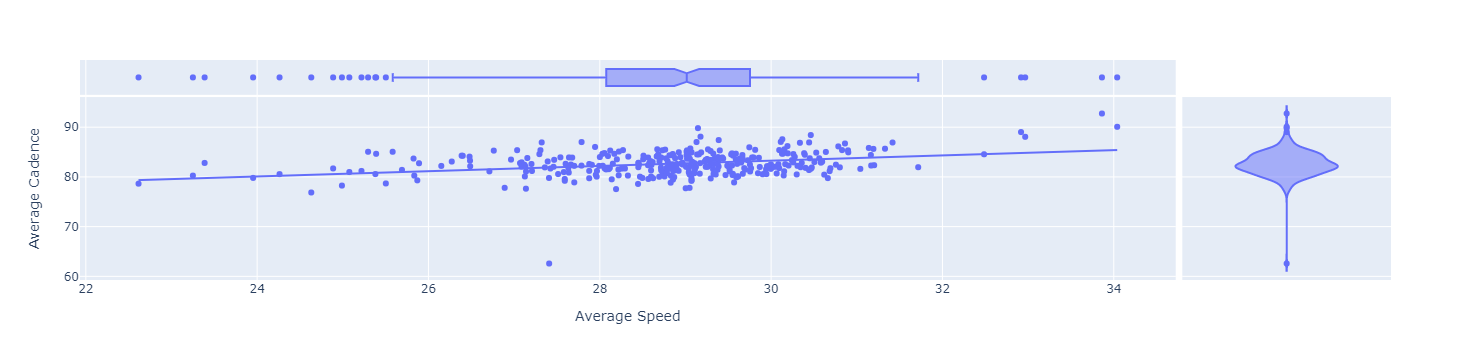

In [9]:
fig = px.scatter(df, x="Average Speed", y="Average Cadence", trendline="ols", marginal_y='violin', marginal_x='box')
fig.show()

This is the correlation matrix using the Pearson method. 

Since all the features are numeric, the Pearson is a good method to use for correlation

<AxesSubplot:>

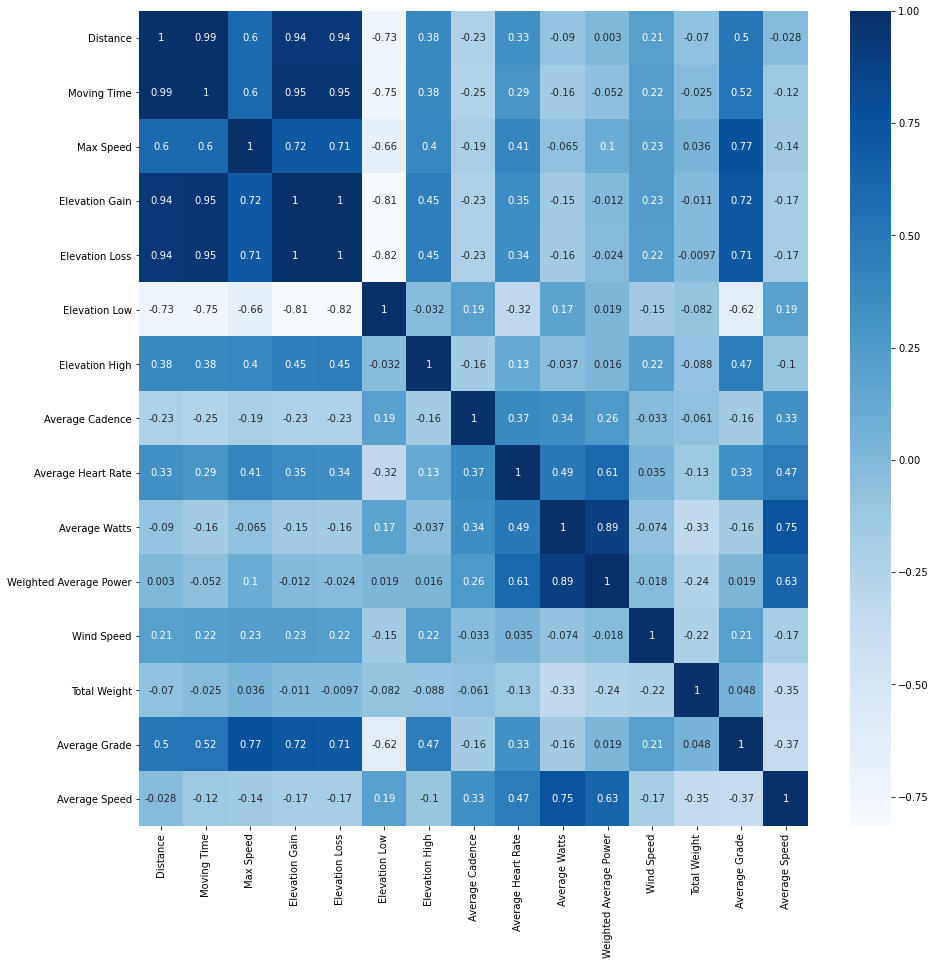

In [10]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(15,15))        
sns.heatmap(df_corr, annot=True, cmap="Blues", ax=ax)

Dropping features that have low correlation with the target (Average Speed):

In [11]:
df = df.drop(columns = ['Elevation High', 'Elevation Low', 'Elevation Loss', 'Elevation Gain', 'Max Speed', 'Moving Time', 'Distance'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Activity Date           330 non-null    datetime64[ns]
 1   Average Cadence         330 non-null    float64       
 2   Average Heart Rate      330 non-null    float64       
 3   Average Watts           330 non-null    float64       
 4   Weighted Average Power  330 non-null    float64       
 5   Wind Speed              193 non-null    float64       
 6   Total Weight            330 non-null    float64       
 7   Average Grade           330 non-null    float64       
 8   Average Speed           330 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 23.3 KB


Replotting the correlation matrix

<AxesSubplot:>

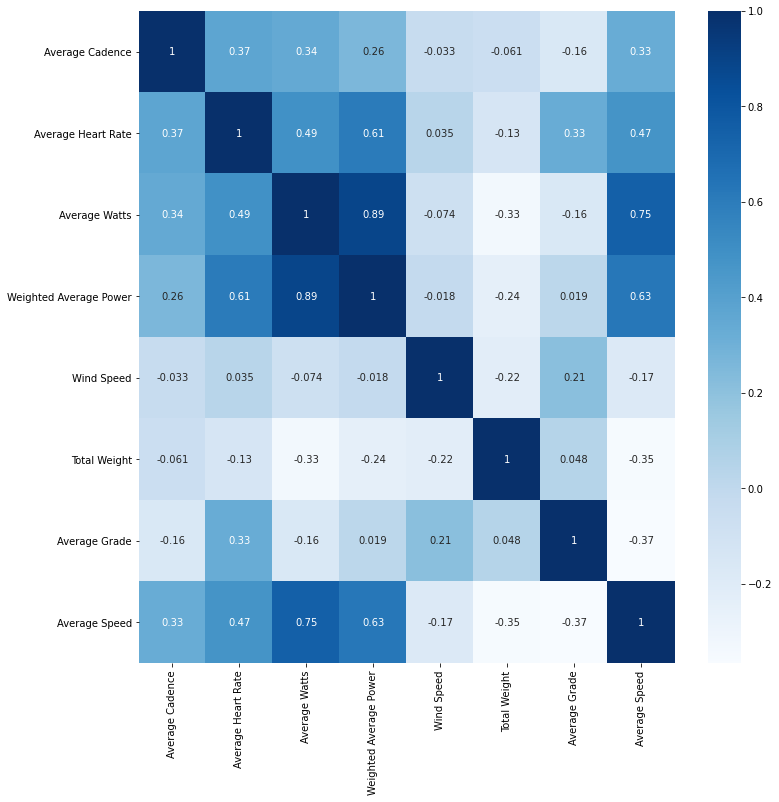

In [12]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12,12))        
sns.heatmap(df_corr, annot=True, cmap="Blues", ax=ax)

Plotting a correlogram of the features and target

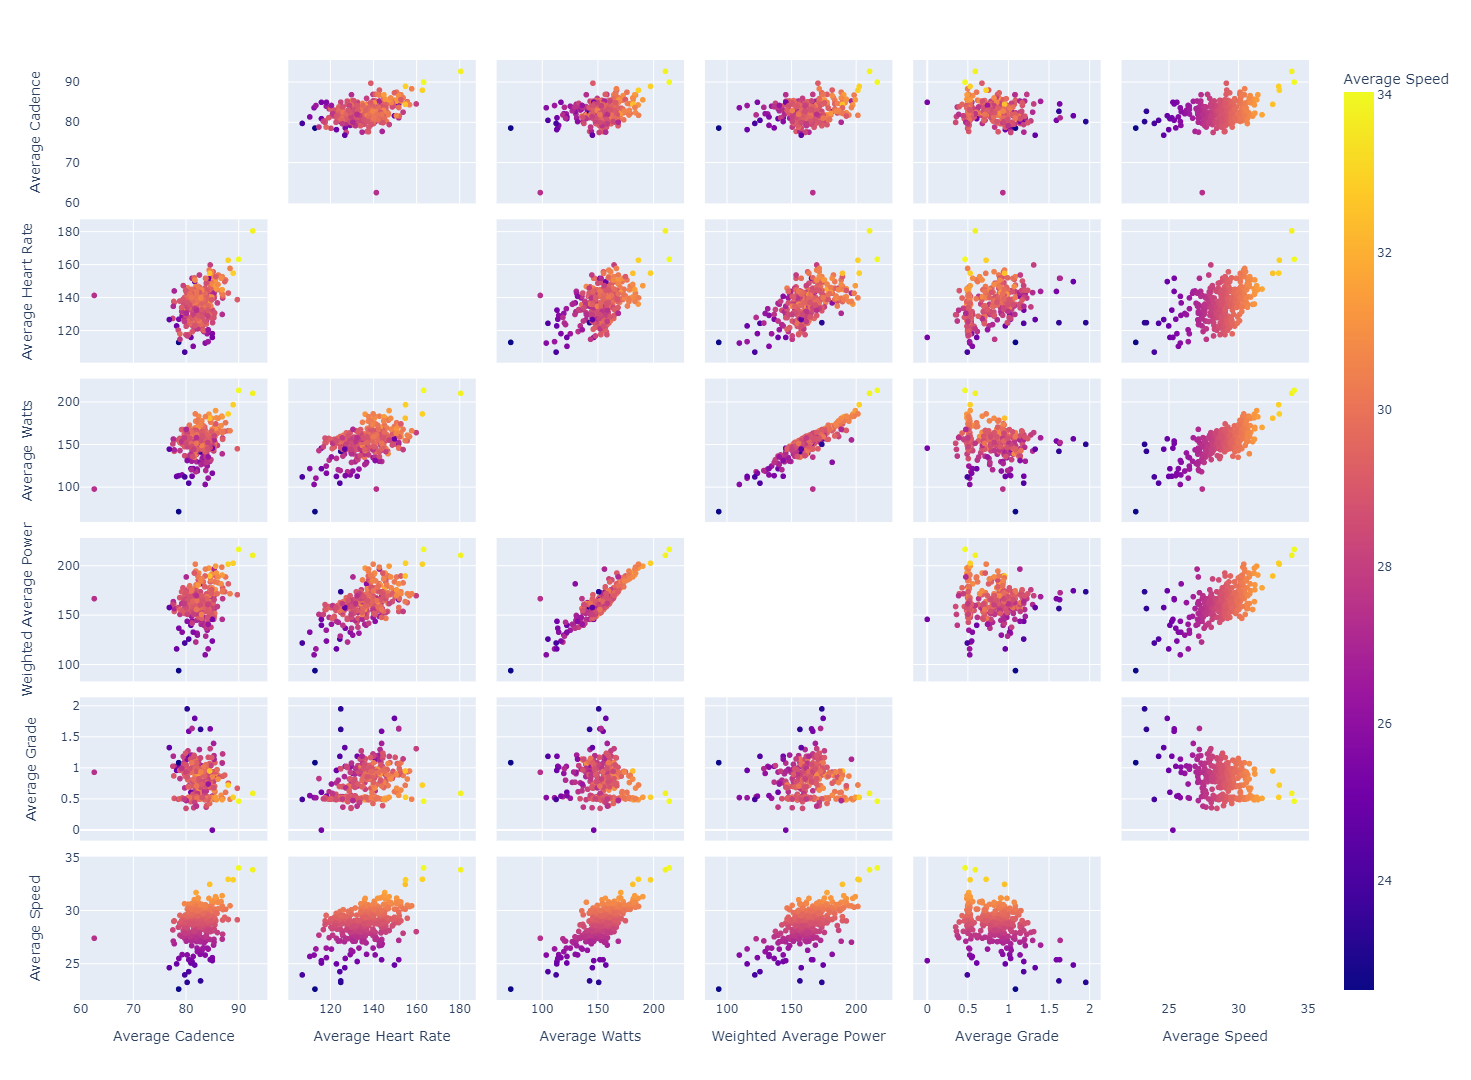

In [13]:
scatter_matrix = px.scatter_matrix(df,
    dimensions=["Average Cadence", "Average Heart Rate", "Average Watts", "Weighted Average Power", "Average Grade", "Average Speed"],
    color="Average Speed", height=1080, width=1080)
scatter_matrix.update_traces(diagonal_visible=False)
scatter_matrix.show()